# Importing Necessary Modules

In [ ]:
from google.colab import drive
from tensorflow.keras.utils import plot_model
import os
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import vgg16
from keras.layers import Conv2D, Input, Dense, Activation, MaxPooling2D, Flatten, AveragePooling2D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from keras.utils import to_categorical
drive.mount('/content/drive')

Mounted at /content/drive


# Fetching Peace and Thumbs Up Data, Labeling Peace as 0, and Thumbs Up as 1

In [ ]:
#reading data and labeling it
DIRECTORY = '/content/drive/MyDrive/thumbsup_peace'
CATEGORIES = ['peace_test', 'peace_train', 'thumbsup_test', 'thumbsup_train']
train_data = []
test_data = []
test_count = 0
train_count = 0
for category in CATEGORIES:
  folder = os.path.join(DIRECTORY, category)
  label = CATEGORIES.index(category) // 2
  # print(label)
  splited_name = category.split('_')
  # print(splited_name[1])

  if(splited_name[1] == "train"):
    # print(category)
      for img in os.listdir(folder):
        image = os.path.join(folder, img)
        image_arr = cv2.imread(image)
        image_arr = cv2.resize(image_arr, (224, 224))
        train_data.append([image_arr, label])
        train_count = train_count+1
  else:
    # print("test")
    for img in os.listdir(folder):
      image = os.path.join(folder, img)
      image_arr = cv2.imread(image)
      image_arr = cv2.resize(image_arr, (224, 224))
      test_data.append([image_arr, label])
      test_count = test_count+1

print('Number of total train data: ', train_count)
print('Number of test data: ', test_count)



Number of total train data:  650
Number of test data:  161


# Making np array X_train_val and Y_train_val from train data

In [ ]:
#making x and y from read data and label
random.shuffle(train_data)
x_train_val = []
y_train_val = []

for features,label in train_data:
  x_train_val.append(features)
  y_train_val.append(label)

#converitn x and y list to np array
x_train_val = np.array(x_train_val)
y_train_val = np.array(y_train_val)

# Making np array x_tes and y_test from test data

In [ ]:
#making x and y from read data and label
random.shuffle(test_data)
x_test = []
y_test = []

for features,label in test_data:
  x_test.append(features)
  y_test.append(label)

#converitn x and y list to np array
x_test = np.array(x_test)
y_test = np.array(y_test)
print(len(y_test))

161


# Plotting X_train_val

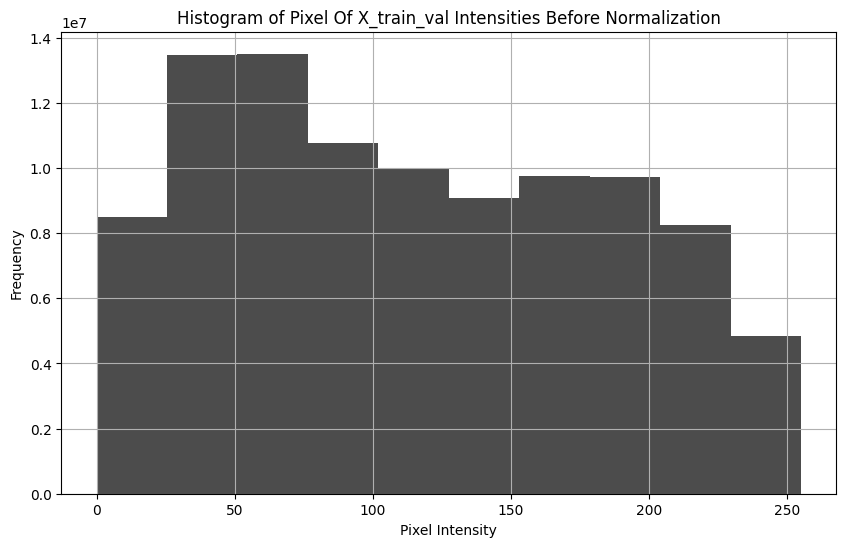

Highest intensity of pixel: 255
Lowest intensity of pixel: 0


In [ ]:
flatten_images = x_train_val.ravel()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(flatten_images, color='black', alpha=0.7)
plt.title('Histogram of Pixel Of X_train_val Intensities Before Normalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print the highest and lowest intensity of pixel
print(f'Highest intensity of pixel: {np.max(flatten_images)}')
print(f'Lowest intensity of pixel: {np.min(flatten_images)}')


# Plotting X_test

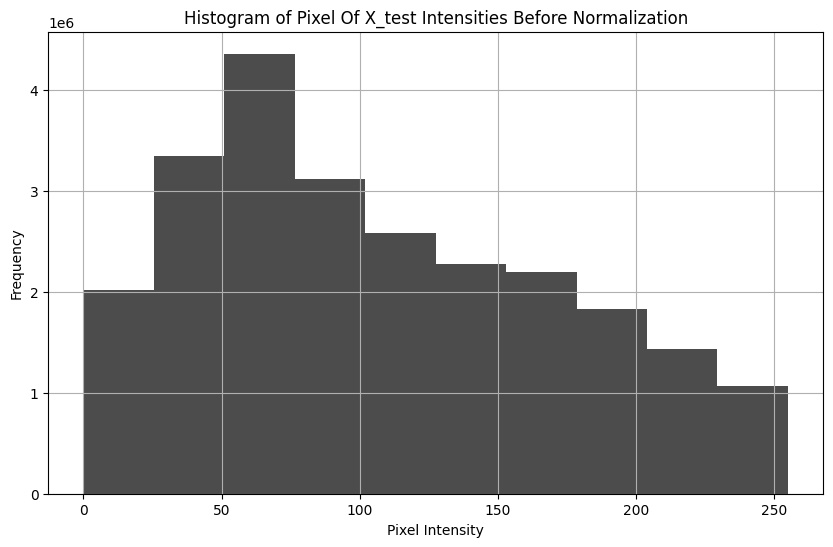

Highest intensity of pixel: 255
Lowest intensity of pixel: 0


In [ ]:
flatten_images = x_test.ravel()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(flatten_images, color='black', alpha=0.7)
plt.title('Histogram of Pixel Of X_test Intensities Before Normalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print the highest and lowest intensity of pixel
print(f'Highest intensity of pixel: {np.max(flatten_images)}')
print(f'Lowest intensity of pixel: {np.min(flatten_images)}')


#Normalizing x_train_val and Plotting

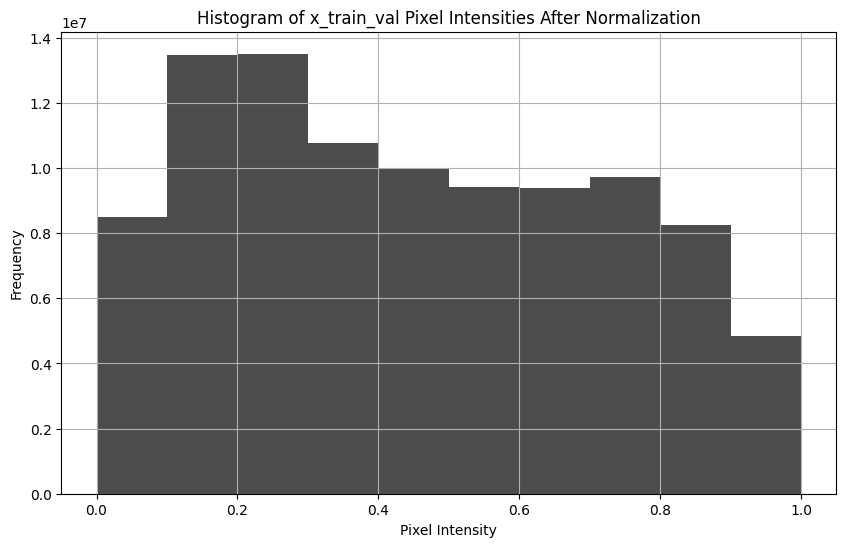

Highest intensity of pixel: 1.0
Lowest intensity of pixel: 0.0


In [ ]:
#normalizing x
x_train_val = x_train_val/255.0

# Assuming x is your array of images with shape (1012, 224, 224, 3)
# Flatten each image and concatenate them into a single array
flatten_images = x_train_val.ravel()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(flatten_images, color='black', alpha=0.7)
plt.title('Histogram of x_train_val Pixel Intensities After Normalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print the highest and lowest intensity of pixel
print(f'Highest intensity of pixel: {np.max(flatten_images)}')
print(f'Lowest intensity of pixel: {np.min(flatten_images)}')


#Normalizing x_test and Plotting

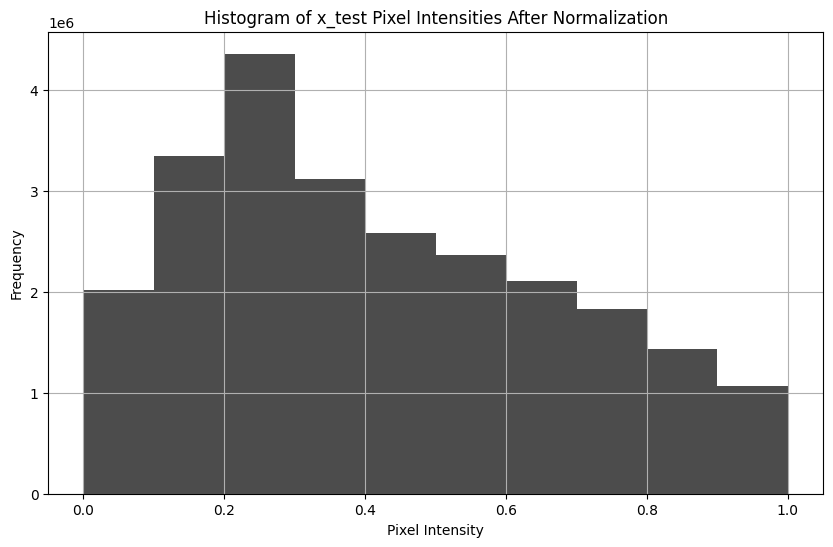

Highest intensity of pixel: 1.0
Lowest intensity of pixel: 0.0


In [ ]:
#normalizing x
x_test = x_test/255.0

# Assuming x is your array of images with shape (1012, 224, 224, 3)
# Flatten each image and concatenate them into a single array
flatten_images = x_test.ravel()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(flatten_images, color='black', alpha=0.7)
plt.title('Histogram of x_test Pixel Intensities After Normalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print the highest and lowest intensity of pixel
print(f'Highest intensity of pixel: {np.max(flatten_images)}')
print(f'Lowest intensity of pixel: {np.min(flatten_images)}')


# Splitting Train and Validation Set

In [ ]:
# x_train, x_val, y_train, y_val  = train_test_split(x_train_val, y_train_val, test_size=0.1)
x_train = x_train_val[:int(len(x_train_val)*.9)]
x_val = x_train_val[-int(len(x_train_val)*.1):]
y_train = y_train_val[:int(len(y_train_val)*.9)]
y_val = y_train_val[-int(len(y_train_val)*.1):]

# Plotting y_train, y_val and y_test

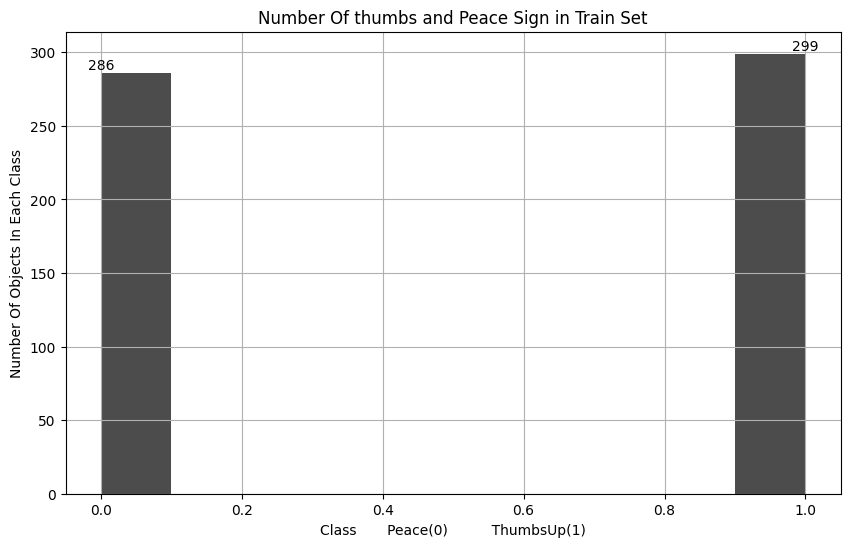

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_train, color='Black', alpha=0.7)
plt.title('Number Of thumbs and Peace Sign in Train Set')
plt.xlabel('Class       Peace(0)          ThumbsUp(1)')
plt.ylabel('Number Of Objects In Each Class')
plt.grid('true')

# Get the counts of objects in each class
counts = np.bincount(y_train)
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

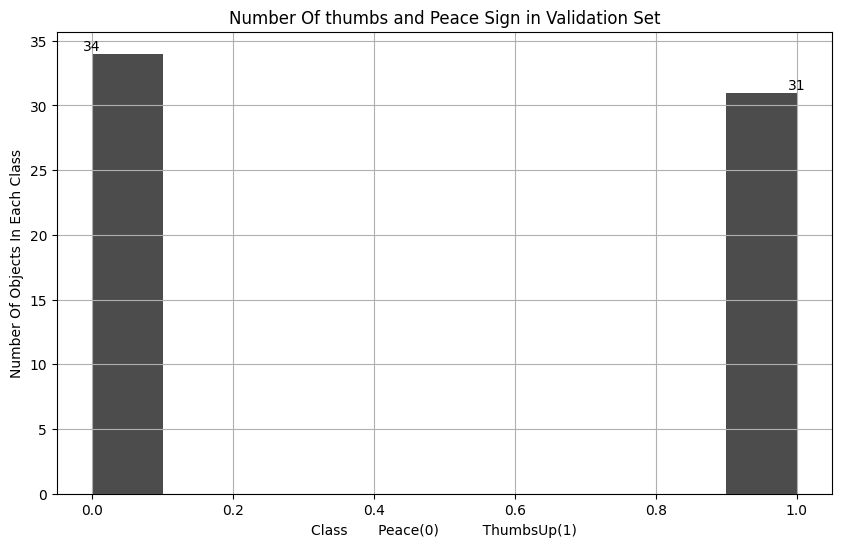

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_val, color='Black', alpha=0.7)
plt.title('Number Of thumbs and Peace Sign in Validation Set')
plt.xlabel('Class       Peace(0)          ThumbsUp(1)')
plt.ylabel('Number Of Objects In Each Class')
plt.grid('true')
counts = np.bincount(y_val)
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

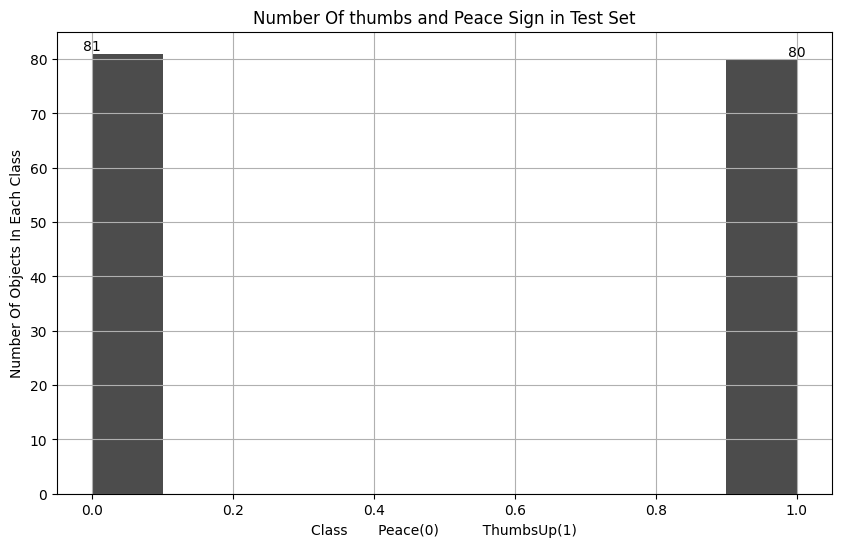

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_test, color='Black', alpha=0.7)
plt.title('Number Of thumbs and Peace Sign in Test Set')
plt.xlabel('Class       Peace(0)          ThumbsUp(1)')
plt.ylabel('Number Of Objects In Each Class')
plt.grid('true')
counts = np.bincount(y_test)
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

# Printing The Shapes of Train, Test and Validation Data

In [ ]:
print('Shape of x_train', np.shape(x_train))
print('Shape of x_val', np.shape(x_val))
print('Shape of x_test', np.shape(x_test))
print('Shape of y_train', np.shape(y_train))
print('Shape of y_val', np.shape(y_val))
print('Shape of y_test', np.shape(y_test))

Shape of x_train (585, 224, 224, 3)
Shape of x_val (65, 224, 224, 3)
Shape of x_test (161, 224, 224, 3)
Shape of y_train (585,)
Shape of y_val (65,)
Shape of y_test (161,)


# My Custom Neural Network

In [ ]:
# Convert labels to one-hot encoding
num_classes = 2
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_val_onehot = to_categorical(y_val, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

In [ ]:
inputs = Input((224,224, 3), name='input')

# Block 1
x_custom = Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv1_custom')(inputs)
x_custom = Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv2_custom')(x_custom)
x_custom = MaxPooling2D((2, 2), name='block1_pool_custom')(x_custom)

# Block 2
x_custom = Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv1_custom')(x_custom)
x_custom = Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv2_custom')(x_custom)
x_custom = MaxPooling2D((2, 2), name='block2_pool_custom')(x_custom)

# Block 3
x_custom = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv1_custom')(x_custom)
x_custom = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv2_custom')(x_custom)
x_custom = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv3_custom')(x_custom)
x_custom = AveragePooling2D((2, 2), name='block3_avg_pool_custom')(x_custom)

# Flatten
x_custom = Flatten(name='flatten_custom')(x_custom)
x_custom = Dense(512, activation='relu', name='fc1_custom')(x_custom)
x_custom = Dense(256, activation='relu', name='fc2_custom')(x_custom)

# Output
outputs = Dense(2, activation='softmax', name='predictions_custom')(x_custom)

# Custom CNN model
model = Model(inputs, outputs, name='cnn_model')
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])
model.summary()


Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1_custom (Conv2  (None, 224, 224, 32)      896       
 D)                                                              
                                                                 
 block1_conv2_custom (Conv2  (None, 224, 224, 32)      9248      
 D)                                                              
                                                                 
 block1_pool_custom (MaxPoo  (None, 112, 112, 32)      0         
 ling2D)                                                         
                                                                 
 block2_conv1_custom (Conv2  (None, 112, 112, 64)      18496     
 D)                                                      

# Showing The Model Architecture

In [ ]:
# Plot and display the model architecture in the notebook
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Trainning The model with x and y

In [ ]:
history = model.fit(x_train, y_train_onehot, epochs=10, validation_data=(x_val, y_val_onehot), batch_size=16)

Epoch 1/10
37/37 [==============================] - 256s 7s/step - loss: 0.6922 - accuracy: 0.5111 - val_loss: 0.6937 - val_accuracy: 0.4154
Epoch 2/10
37/37 [==============================] - 269s 7s/step - loss: 0.6762 - accuracy: 0.5795 - val_loss: 0.6437 - val_accuracy: 0.8154
Epoch 3/10
37/37 [==============================] - 253s 7s/step - loss: 0.6323 - accuracy: 0.7077 - val_loss: 0.5763 - val_accuracy: 0.7846
Epoch 4/10
37/37 [==============================] - 251s 7s/step - loss: 0.5578 - accuracy: 0.7709 - val_loss: 0.5660 - val_accuracy: 0.6769
Epoch 5/10
37/37 [==============================] - 254s 7s/step - loss: 0.5156 - accuracy: 0.7590 - val_loss: 0.5488 - val_accuracy: 0.6615
Epoch 6/10
37/37 [==============================] - 249s 7s/step - loss: 0.4379 - accuracy: 0.8359 - val_loss: 0.3810 - val_accuracy: 0.8923
Epoch 7/10
37/37 [==============================] - 257s 7s/step - loss: 0.3935 - accuracy: 0.8496 - val_loss: 0.4012 - val_accuracy: 0.8462
Epoch 8/10
37

In [ ]:
performance_dict = history.history
print(performance_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Check The Learning Curves

Text(0.5, 1.0, 'Train Accuracy vs Validation Accuracy')

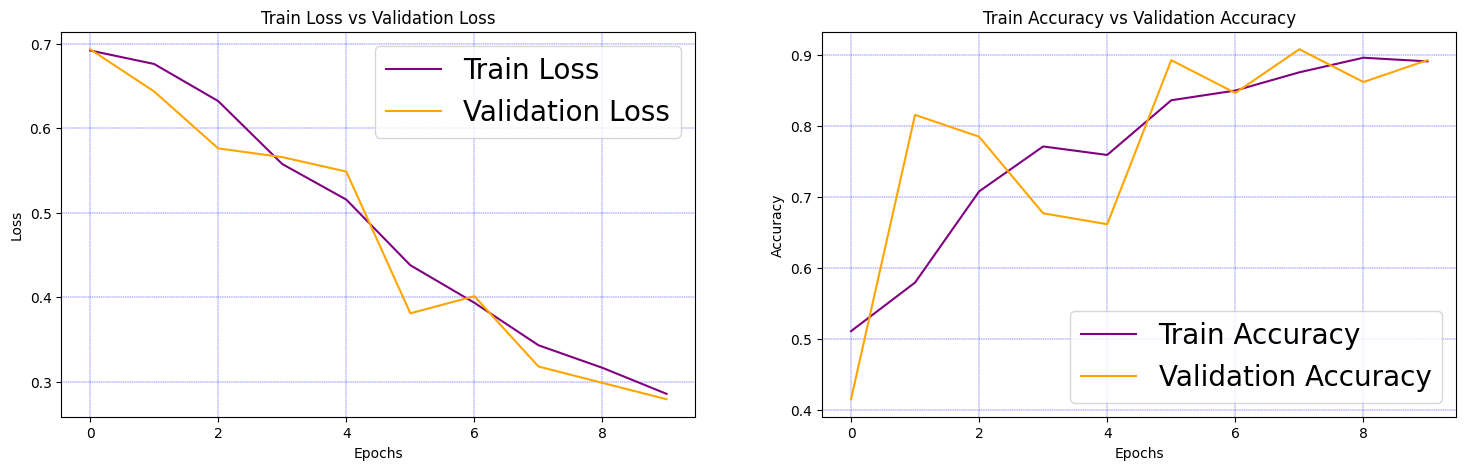

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(performance_dict ['loss'], color='purple', label='Train Loss')
plt.plot(performance_dict ['val_loss'], color='orange', label='Validation Loss')
plt.legend(loc='upper right', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(color='blue', linewidth=0.3, linestyle='--')
plt.title('Train Loss vs Validation Loss')

plt.subplot(1,2,2)
plt.plot(performance_dict ['accuracy'], color='purple', label='Train Accuracy')
plt.plot(performance_dict ['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(color='blue', linewidth=0.3, linestyle='--')
plt.title('Train Accuracy vs Validation Accuracy')

# Evaluate The Model On Validation Set

In [ ]:
scores = model.evaluate(x_val, y_val_onehot)
# print(model.metrics_names)
print('Evaluating The Model On Validation Data')
print(model.metrics_names[1], scores[1]*100)


3/3 [==============================] - 8s 2s/step - loss: 0.2792 - accuracy: 0.8923
Evaluating The Model On Validation Data
accuracy 89.2307698726654


# Check What the model actually predicts In Validation Data

0


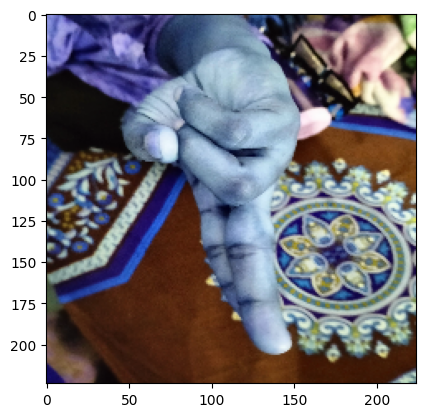

In [ ]:
plt.imshow(x_val[26])
print(y_val[26])

# Check What the model predicts in Test data

In [ ]:
prediction = model.predict(x_test)

6/6 [==============================] - 23s 4s/step


In [ ]:
prediction[1]

array([0.7615494 , 0.23845054], dtype=float32)

In [ ]:
y_test[1]

0

In [ ]:
y_predicted = []
# length = prediction.shape[0]
for i in range(prediction.shape[0]):
  if(prediction[i][0] > prediction[i][1]):
    y_predicted.append(0)
  else:
    y_predicted.append(1)

y_predicted_text = []
for i in range(len(y_predicted)):
  if(y_predicted[i] == 0):
    y_predicted_text.append('Peace')
  else:
    y_predicted_text.append('Thumbs Up')


Peace


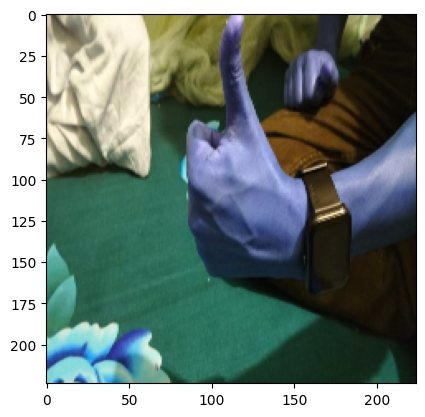

In [ ]:
plt.imshow(x_test[20])
print(y_predicted_text[20])

# Evaluate The Model On Test Set

In [ ]:
scores = model.evaluate(x_test, y_test_onehot)
# print(model.metrics_names)
print('Evaluating The Model On Test Data')
print(model.metrics_names[0], scores[0]*100)
print(model.metrics_names[1], scores[1]*100)

6/6 [==============================] - 17s 3s/step - loss: 0.2573 - accuracy: 0.8882
Evaluating The Model On Test Data
loss 25.729626417160034
accuracy 88.8198733329773


# Confussion Matrix Of CNN Based Classifier

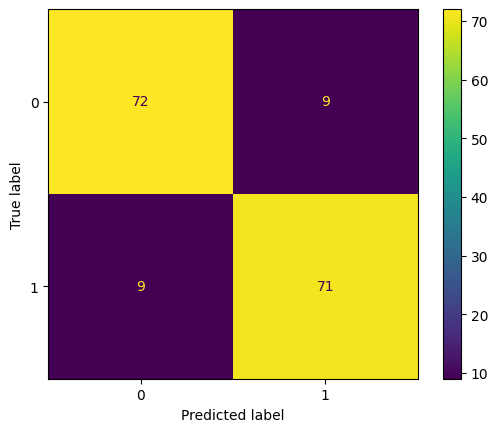

In [ ]:
y_predicted
actual = y_test
conf_mat = confusion_matrix(actual, y_predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

# A fully connected neural network-based binary classifier

In [ ]:
# Define the input layer
inputs = Input((224, 224, 3), name='input')

x = Flatten()(inputs)
x = Dense(32, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
fcnn_model = Model(inputs, outputs, name='FCNN')
fcnn_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])
fcnn_model.summary()


Model: "FCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 32)                4816928   
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4821153 (18.39 MB)
Trainable params: 4821153 (18

In [ ]:
# Plot and display the model architecture in the notebook
plot_model(fcnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = fcnn_model.fit(x_train, y_train, epochs=25, validation_data=(x_val, y_val), batch_size=32)

Epoch 1/25
19/19 [==============================] - 3s 86ms/step - loss: 0.7025 - accuracy: 0.4821 - val_loss: 0.6896 - val_accuracy: 0.5231
Epoch 2/25
19/19 [==============================] - 1s 73ms/step - loss: 0.6892 - accuracy: 0.5453 - val_loss: 0.6970 - val_accuracy: 0.4769
Epoch 3/25
19/19 [==============================] - 1s 72ms/step - loss: 0.6791 - accuracy: 0.5624 - val_loss: 0.6627 - val_accuracy: 0.6462
Epoch 4/25
19/19 [==============================] - 1s 70ms/step - loss: 0.6560 - accuracy: 0.6444 - val_loss: 0.6437 - val_accuracy: 0.7231
Epoch 5/25
19/19 [==============================] - 2s 89ms/step - loss: 0.6342 - accuracy: 0.7026 - val_loss: 0.6275 - val_accuracy: 0.7385
Epoch 6/25
19/19 [==============================] - 2s 95ms/step - loss: 0.6193 - accuracy: 0.6957 - val_loss: 0.6272 - val_accuracy: 0.7077
Epoch 7/25
19/19 [==============================] - 2s 88ms/step - loss: 0.5962 - accuracy: 0.7709 - val_loss: 0.6216 - val_accuracy: 0.6923
Epoch 8/25
19

# Check The Learning Curves for FCNN

In [ ]:
performance_dict = history.history
print(performance_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 1.0, 'Train Accuracy vs Validation Accuracy')

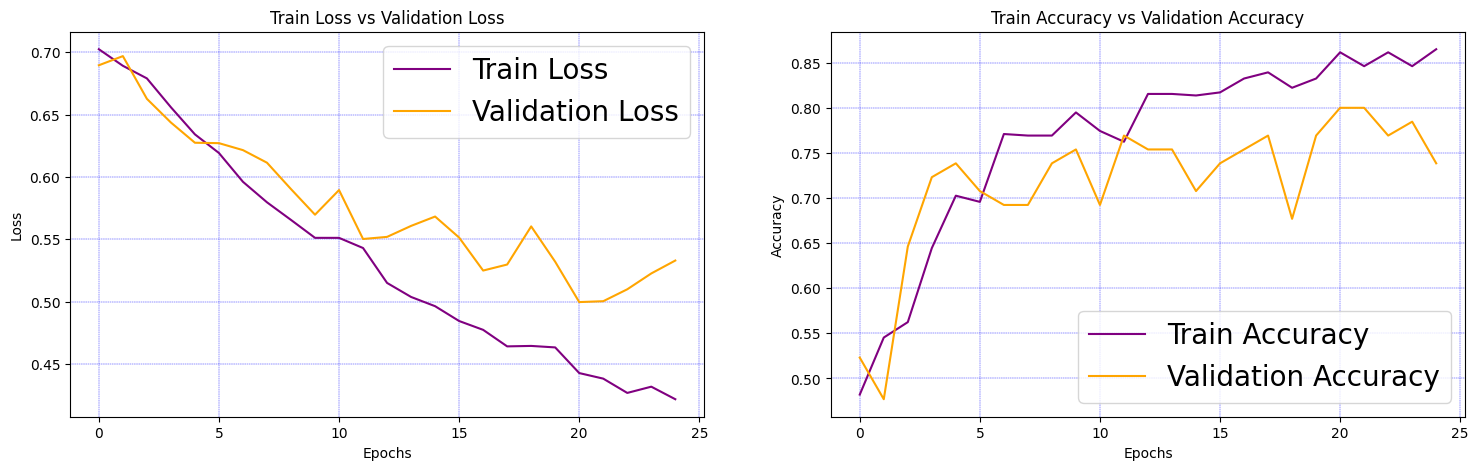

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(performance_dict ['loss'], color='purple', label='Train Loss')
plt.plot(performance_dict ['val_loss'], color='orange', label='Validation Loss')
plt.legend(loc='upper right', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(color='blue', linewidth=0.3, linestyle='--')
plt.title('Train Loss vs Validation Loss')

plt.subplot(1,2,2)
plt.plot(performance_dict ['accuracy'], color='purple', label='Train Accuracy')
plt.plot(performance_dict ['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(color='blue', linewidth=0.3, linestyle='--')
plt.title('Train Accuracy vs Validation Accuracy')

# Check What The Model Actually Predics on Test data

In [ ]:
predicted = fcnn_model.predict(x_test)

6/6 [==============================] - 0s 9ms/step


In [ ]:
predicted[1]

array([0.20552875], dtype=float32)

In [ ]:
y_test[1]

0

# Evaluate The FCNN model with Validation Data

In [ ]:
scores = fcnn_model.evaluate(x_val, y_val)
# print(model.metrics_names)
print('Evaluating The FCNN Model On Validation Data')
print(model.metrics_names[1], scores[1]*100)


3/3 [==============================] - 0s 9ms/step - loss: 0.5330 - accuracy: 0.7385
Evaluating The FCNN Model On Validation Data
accuracy 73.84615540504456


# Evaluate The FCNN with Test Data

In [ ]:
scores = fcnn_model.evaluate(x_test, y_test)
# print(model.metrics_names)
print('Evaluating The FCNN Model On Test Data')
print(model.metrics_names[0], scores[0]*100)
print(model.metrics_names[1], scores[1]*100)

6/6 [==============================] - 0s 10ms/step - loss: 0.4133 - accuracy: 0.8634
Evaluating The FCNN Model On Test Data
loss 41.333988308906555
accuracy 86.33540272712708


# Confussion Matrix Of FCNN Based Classifier

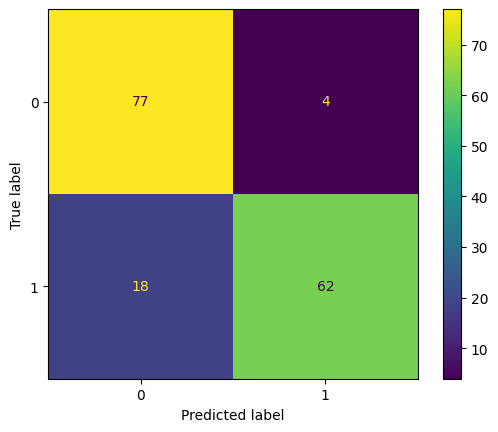

In [ ]:
# predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = y_test
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()